# Story data 
In this notebook, we will sketch out a tale worth telling. This notebook will mainly be used to generate figures and data for the oultine. Every block of code will have some info as to why the data/figure it generates are needed.

In [1]:
import psi4
import numpy as np
from scipy.linalg import eigh
from compChem import Hartree_fock
from compChem.CIS import CISMolecule

We will make figures of the $H_2$ stretch. These pictures will be used to show the effect of spin contamination on a practical system.


In [19]:
psi4.set_options({"basis":"sto-3g", "scf_type":"pk", "reference":"rhf", "d_convergence":"1e-12"}) # cc-pvdz is chosen because uhf and cuhf will use this basis as well
hydrogen = Hartree_fock.UHFMolecule("""H""")
hydrogen.setConvergence(1e-12)
h_energy = hydrogen.iterator(mute=True, criterion="energy")[0]
h_energy


-0.46658184955727544

In [39]:
import numpy as np
distances = np.arange(0.2, 5, 0.1)
energies_rhf = []
spincont_rhf = []
for distance in distances:
    h2 = Hartree_fock.RHFMolecule(f"""
    H 0 0 0
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True, criterion="energy")
    energies_rhf.append(E[0] - 2*h_energy)
    spincont_rhf.append(h2.getSpinContamination())

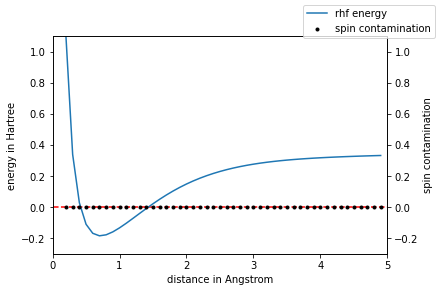

In [58]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(distances, energies_rhf, label="rhf energy")
ax2.scatter(distances, spincont_rhf, label="spin contamination", color="black", marker=".")
ax1.set_xlabel("distance in Angstrom")
ax1.set_ylabel("energy in Hartree")
ax2.set_ylabel("spin contamination")
ax1.hlines(0, 0, 5, color="red", linestyles="--")
fig.legend( loc="upper right")
ax1.axis([0, 5, -0.3, 1.1])
ax2.axis([0, 5, -0.3, 1.1])
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/rhf.png")

In [53]:
import numpy as np
distances = np.arange(0.2, 5, 0.1)
energies_uhf = []
spincont_uhf = []
for distance in distances:
    h2 = Hartree_fock.UHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True)
    energies_uhf.append(E[0] - 2*h_energy)
    spincont_uhf.append(h2.getSpinContamination())

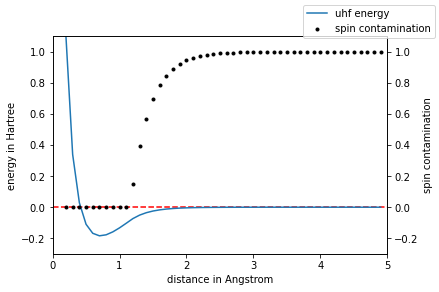

In [57]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(distances, energies_uhf, label="uhf energy")
ax2.scatter(distances, spincont_uhf, label="spin contamination", color="black", marker=".")
ax1.set_xlabel("distance in Angstrom")
ax1.set_ylabel("energy in Hartree")
ax2.set_ylabel("spin contamination")
ax1.hlines(0, 0, 5, color="red", linestyles="--")
fig.legend( loc="upper right")
ax1.axis([0, 5, -0.3, 1.1])
ax2.axis([0, 5, -0.3, 1.1])
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/uhf.png")

In [65]:
distances = np.arange(0.2, 5, 0.1)
energies_cuhf = []
spincont_cuhf = []
for distance in distances:
    h2 = Hartree_fock.CUHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True, criterion="energy", mixedGuess=True)
    energies_cuhf.append(E[0] -2*h_energy)
    spincont_cuhf.append(h2.getSpinContamination())


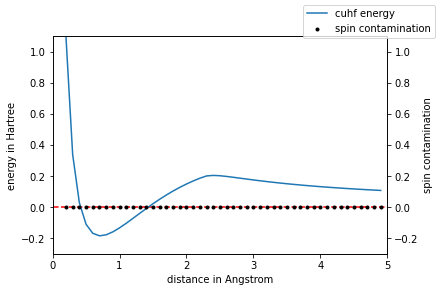

In [66]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(distances, energies_cuhf, label="cuhf energy")
ax2.scatter(distances, spincont_cuhf, label="spin contamination", color="black", marker=".")
ax1.set_xlabel("distance in Angstrom")
ax1.set_ylabel("energy in Hartree")
ax2.set_ylabel("spin contamination")
ax1.hlines(0, 0, 5, color="red", linestyles="--")
fig.legend( loc="upper right")
ax1.axis([0, 5, -0.3, 1.1])
ax2.axis([0, 5, -0.3, 1.1])
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/cuhf_mix.png")

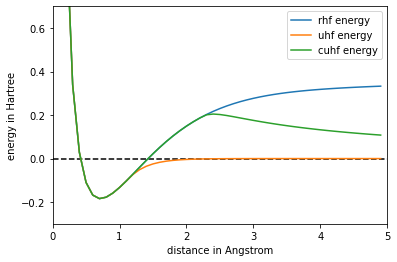

In [31]:
energies = np.array([energies_rhf, energies_uhf, energies_cuhf]).T
p = plt.plot(distances, energies)
plt.hlines(0, 0, 5, color="black", linestyles="--")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(["rhf energy", "uhf energy", "cuhf energy"], loc="upper right")
plt.axis([0, 5, -0.3, 0.7])
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/combo.png")

In [32]:
distances = np.arange(0.2, 5, 0.1)
energies_cuhf = []
spincont_cuhf = []
for distance in distances:
    h2 = Hartree_fock.CUHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True, criterion="energy", mixedGuess=False)
    energies_cuhf.append(E[0] - 2*h_energy)
    spincont_cuhf.append(h2.getSpinContamination())

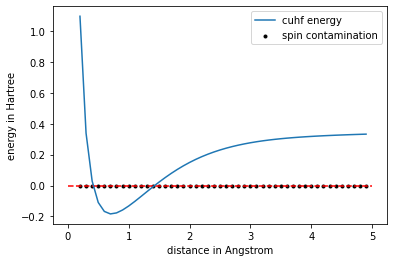

In [34]:
import matplotlib.pyplot as plt
p = plt.plot(distances, energies_cuhf, label="cuhf energy")
plt.hlines(0, 0, 5, color="red", linestyles="--")
plt.scatter(distances, spincont_cuhf, color="black", marker=".", label="spin contamination")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(loc="upper right")
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/cuhf_nomix.png")

The CIS data still needs to be checked. We will already generate some data for $H_3$ in STO-3G.


In [52]:
psi4.set_options({"basis":"sto-3g"})
h3_uhf = Hartree_fock.UHFMolecule("""
H 0 0 0
H 0 0.86602540378 0.5
H 0 0 1
units angstrom""")
h3_uhf.setConvergence(1e-12)
end_data = h3_uhf.iterator(mute=True, criterion="energy")
end_data

(-1.3359800541782527, 161)

In [53]:
h3_uhf_cis = CISMolecule(h3_uhf)


In [54]:
h3_uhf_cis.GetExitations("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/data/h3_uhf_cis.txt")

In [55]:
psi4.set_options({"basis":"sto-3g"})
h3_cuhf = Hartree_fock.CUHFMolecule("""
H 0 0 0
H 0 0.86602540378 0.5
H 0 0 1
units angstrom""")
h3_cuhf.setConvergence(1e-12)
end_data = h3_cuhf.iterator(mute=True, criterion="energy", mixedGuess=True)
end_data
h3_cuhf.getElectronicEnergy()

-2.9157073875390065

In [56]:
h3_cuhf_cis = CISMolecule(h3_cuhf)
h3_cuhf_cis.GetExitations("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/data/h3_cuhf°cis.txt")

In [57]:
h3_uhf_cis.excitation_energies

array([-2.93813926, -2.92351169, -2.89602203, -2.84007912, -2.56094658,
       -2.42807198, -2.30979275, -2.17957094, -2.16030774, -2.1370358 ])

/usr/local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


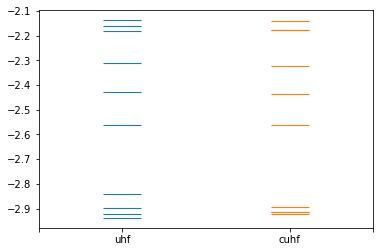

In [59]:
import matplotlib.pyplot as plt
eng = h3_uhf_cis.excitation_energies, h3_cuhf_cis.excitation_energies
cat = 0.5, 2.5
for x, y in zip(cat, eng):
    plt.scatter([x]*len(y), y, marker="_", linewidths=1.1, s=1444)
plt.xticks([-0.5, 0.5, 2.5, 3.5])
plt.axes().set_xticklabels(["", "uhf", "cuhf", ""])
plt.savefig("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/theory/outline_BachelorProject/notes/figures/h3_cis.png")

In [ ]:
(-0.7837926540822389, 34)